# Facebook Marketplace Recommendation Ranking System - EDA

## Library Imports & Import Data

In [36]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [6]:
if not os.path.exists('./images_fb.zip'):
    !wget "https://aicore-files.s3.amazonaws.com/images_fb.zip"

--2022-10-28 16:12:35--  https://aicore-files.s3.amazonaws.com/images_fb.zip
Resolving aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)... 52.217.85.12
Connecting to aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)|52.217.85.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2550752631 (2.4G) [application/zip]
Saving to: ‘images_fb.zip’

images_fb.zip       100%[===================>]   2.38G  12.7MB/s    in 3m 59s  

2022-10-28 16:16:35 (10.2 MB/s) - ‘images_fb.zip’ saved [2550752631/2550752631]



In [2]:
images_df = pd.read_csv('Images.csv', lineterminator="\n")
images_df.head()

,Unnamed: 0,id,product_id
0,0,912bb259-3ad9-457b-9db1-ce1da9016057,5f5f57d7-778f-4336-bb10-b43863418c8c
1,1,b166d305-b852-4bdd-83f4-465b20da94fa,5f5f57d7-778f-4336-bb10-b43863418c8c
2,2,68f5a29d-0075-4d60-81c1-ab684a82e50c,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
3,3,f6a309d7-d247-446a-9b5e-aceefdd4334d,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
4,4,2c2b3a6f-15b3-4289-937a-15482d9f5781,8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf


In [3]:
products_df = pd.read_csv('Products.csv', lineterminator='\n')
products_df.head()

,Unnamed: 0,id,product_name,category,product_description,price,location
0,0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire"
1,1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland"
2,2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire"
3,3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset"
4,4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,£450.00,"Delph, Manchester"


### Have a look at an image

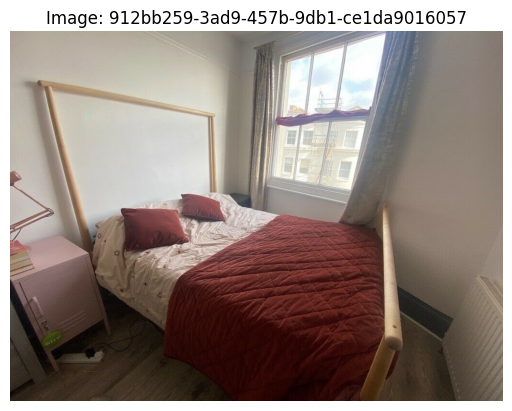

In [16]:
first_id = images_df.id[0]
with ZipFile('./images_fb.zip') as myzip:
    image = myzip.open(f"images/{first_id}.jpg")
img = mpimg.imread(image)
plt.imshow(img)
plt.axis('off');
plt.title(f'Image: {first_id}');

## Clean the tabular data

In [24]:
products_df[products_df.price.str.contains('£')].price.count()

7156

In [34]:
def clean_tabular_data(df):
    return (df.drop(columns='Unnamed: 0')
                .assign(price = df.price.str.replace(',',''))
                .assign(price = lambda df_: df_.price.str.extract(r'£([\d]+.[\d]+)').astype('float'))
    )

clean_tabular_data(products_df)[clean_tabular_data(products_df).price.mod(1) != 0]

,id,product_name,category,product_description,price,location
48,45acbefc-7f24-41ff-af59-374c13b8d9b6,**100% GUARANTEED PRICE!**BRAND NEW-Double Bed...,Home & Garden / Beds & Bedroom Furniture / Dou...,****Please click ;See all ads; on Right top Co...,189.99,"Acton, London"
205,0201baec-ff67-4496-a01c-39e1c3779ca1,"🔥Brand New Wardrobe Sets, Top Quality and Full...",Home & Garden / Beds & Bedroom Furniture / War...,Fully assembled wardrobe sets available in var...,39.99,"Liverpool City Centre, Merseyside"
236,94a34ffd-e6a3-4b31-9ec6-10d20920d671,"House moving supplies, boxes, bubble wrap, tap...",Home & Garden / Other Household Goods,House moving ? Packing ? A range of packaging ...,0.78,"Tonbridge, Kent"
429,126a1fd9-a27c-49a6-be78-dc20f2f8bff5,Free Dining table - Cambridge Re-Use Ref 517.2...,"Home & Garden / Dining, Living Room Furniture ...",L110 W110 H73Free Delivery starts from £10Camb...,0.01,"Cambridge, Cambridgeshire"
442,a9071e3e-41c7-4ff4-bc36-6e417ac0b2e6,"Single Bed | in Oldmeldrum, Aberdeenshire | Gu...",Home & Garden / Beds & Bedroom Furniture / Sin...,Single Divan BedHardly been used as been in a ...,0.01,"Oldmeldrum, Aberdeenshire"
...,...,...,...,...,...,...
6917,5d1de8c9-ca04-47e5-b0d1-481abe8d0fd6,"Swap Wii U games | in Oldmeldrum, Aberdeenshir...",Video Games & Consoles / Consoles / Nintendo W...,Looking to swap for Xbox One or other consoles...,11.11,"Oldmeldrum, Aberdeenshire"
6935,a9e31ee1-c706-42a9-97d9-4ca257e4c6f3,"Nintendo wii | in Harrow, London | Gumtree",Video Games & Consoles / Consoles / Nintendo Wii,Nintendo Wii with 5 games. No longer required ...,55.50,"Harrow, London"
6993,7c2a5053-930a-4fa5-bd3b-dbbf10edd0b9,"Xbox Series S White | in Finchley, London | Gu...",Video Games & Consoles / Consoles / Xbox One,Item is preowned & in working condition. May c...,169.99,"Finchley, London"
7031,ebe8d613-4aa0-477c-8f1a-256ff8d4f248,Microsoft - 512GB SSD Xbox Series S White | in...,Video Games & Consoles / Consoles / Xbox One,Model Name: Xbox Series S\r Brand: Microsoft -...,179.99,"Blackburn, Lancashire"


In [35]:
tweaked_products_df = clean_tabular_data(products_df)

In [ ]:
def resize_image(final_size, im):
    size = im.size
    ratio = float(final_size) / max(size)
    new_image_size = tuple([int(x*ratio) for x in size])
    im = im.resize(new_image_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (final_size, final_size))
    new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
    return new_im

if __name__ == '__main__':
    path = "images/"
    dirs = os.listdir(path)
    final_size = 512
    for n, item in enumerate(dirs[:5], 1):
        im = Image.open('images/' + item)
        new_im = resize_image(final_size, im)
        new_im.save(f'{n}_resized.jpg')